# Random Forest - Regression
#### Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/boring.jpg" style="max-width:400px">

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

# Imports

In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error

In [4]:
# Load the `rock_density_xray.csv` dataset.
rock_density_df = pd.read_csv('rock_density_xray.csv')
rock_density_df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [5]:
rock_density_df.columns = ["Signal", "Density"]

<Axes: xlabel='Signal', ylabel='Density'>

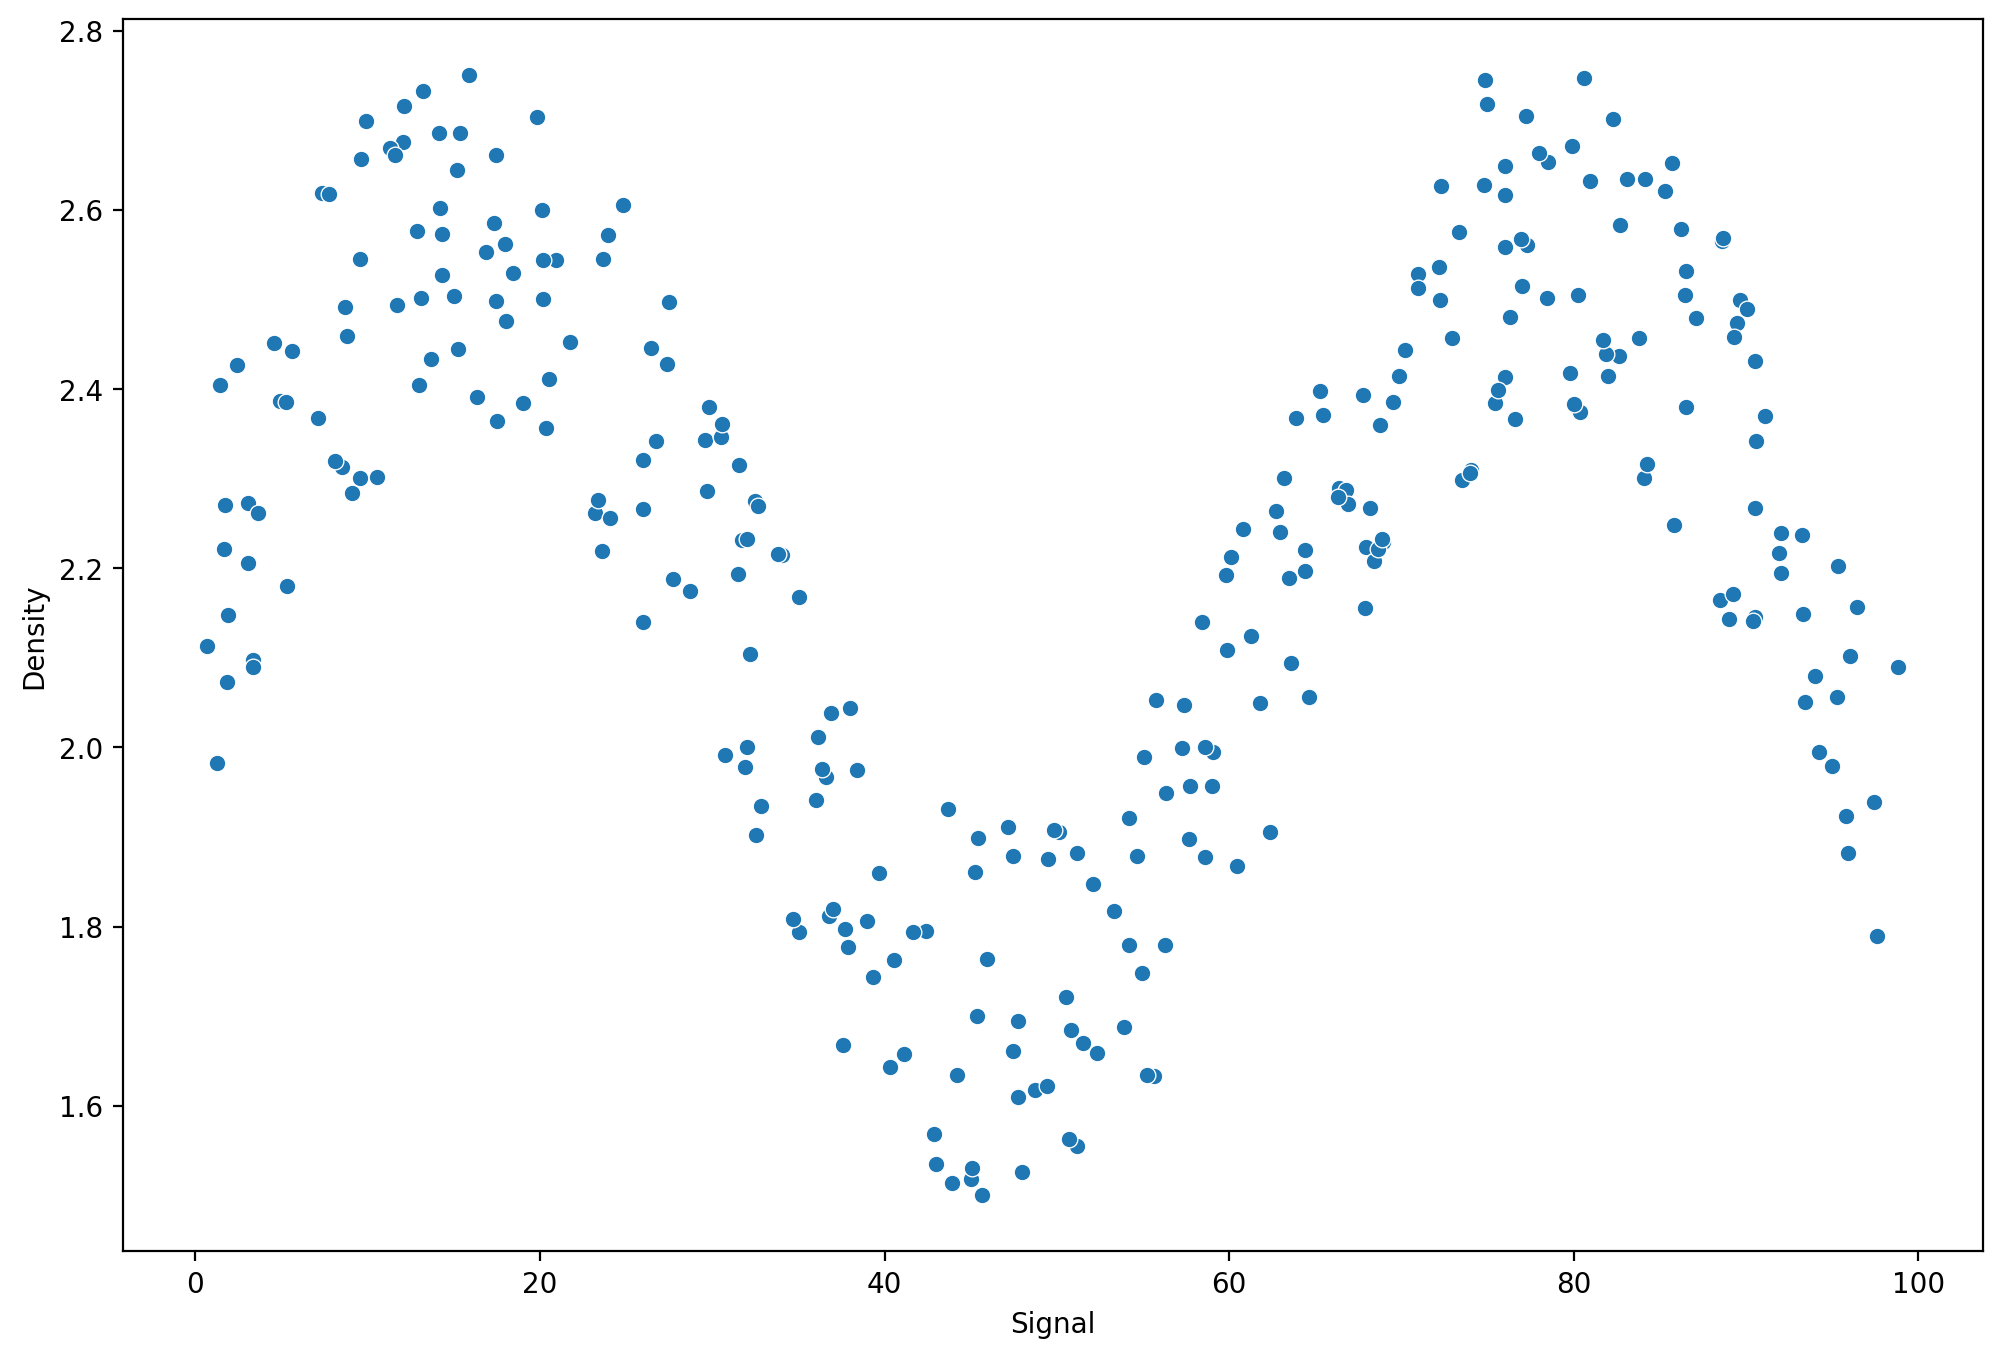

In [7]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=rock_density_df)

## Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [8]:
X = rock_density_df['Signal'].values.reshape(-1,1)  
y = rock_density_df['Density']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [10]:
lr_model = LinearRegression()


In [11]:
lr_model.fit(X_train,y_train)


LinearRegression()

In [12]:
lr_preds = lr_model.predict(X_test)


In [13]:
np.sqrt(mean_squared_error(y_test,lr_preds))


0.2570051996584629

What does the fit look like?

In [14]:
signal_range = np.arange(0,100)


In [15]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))


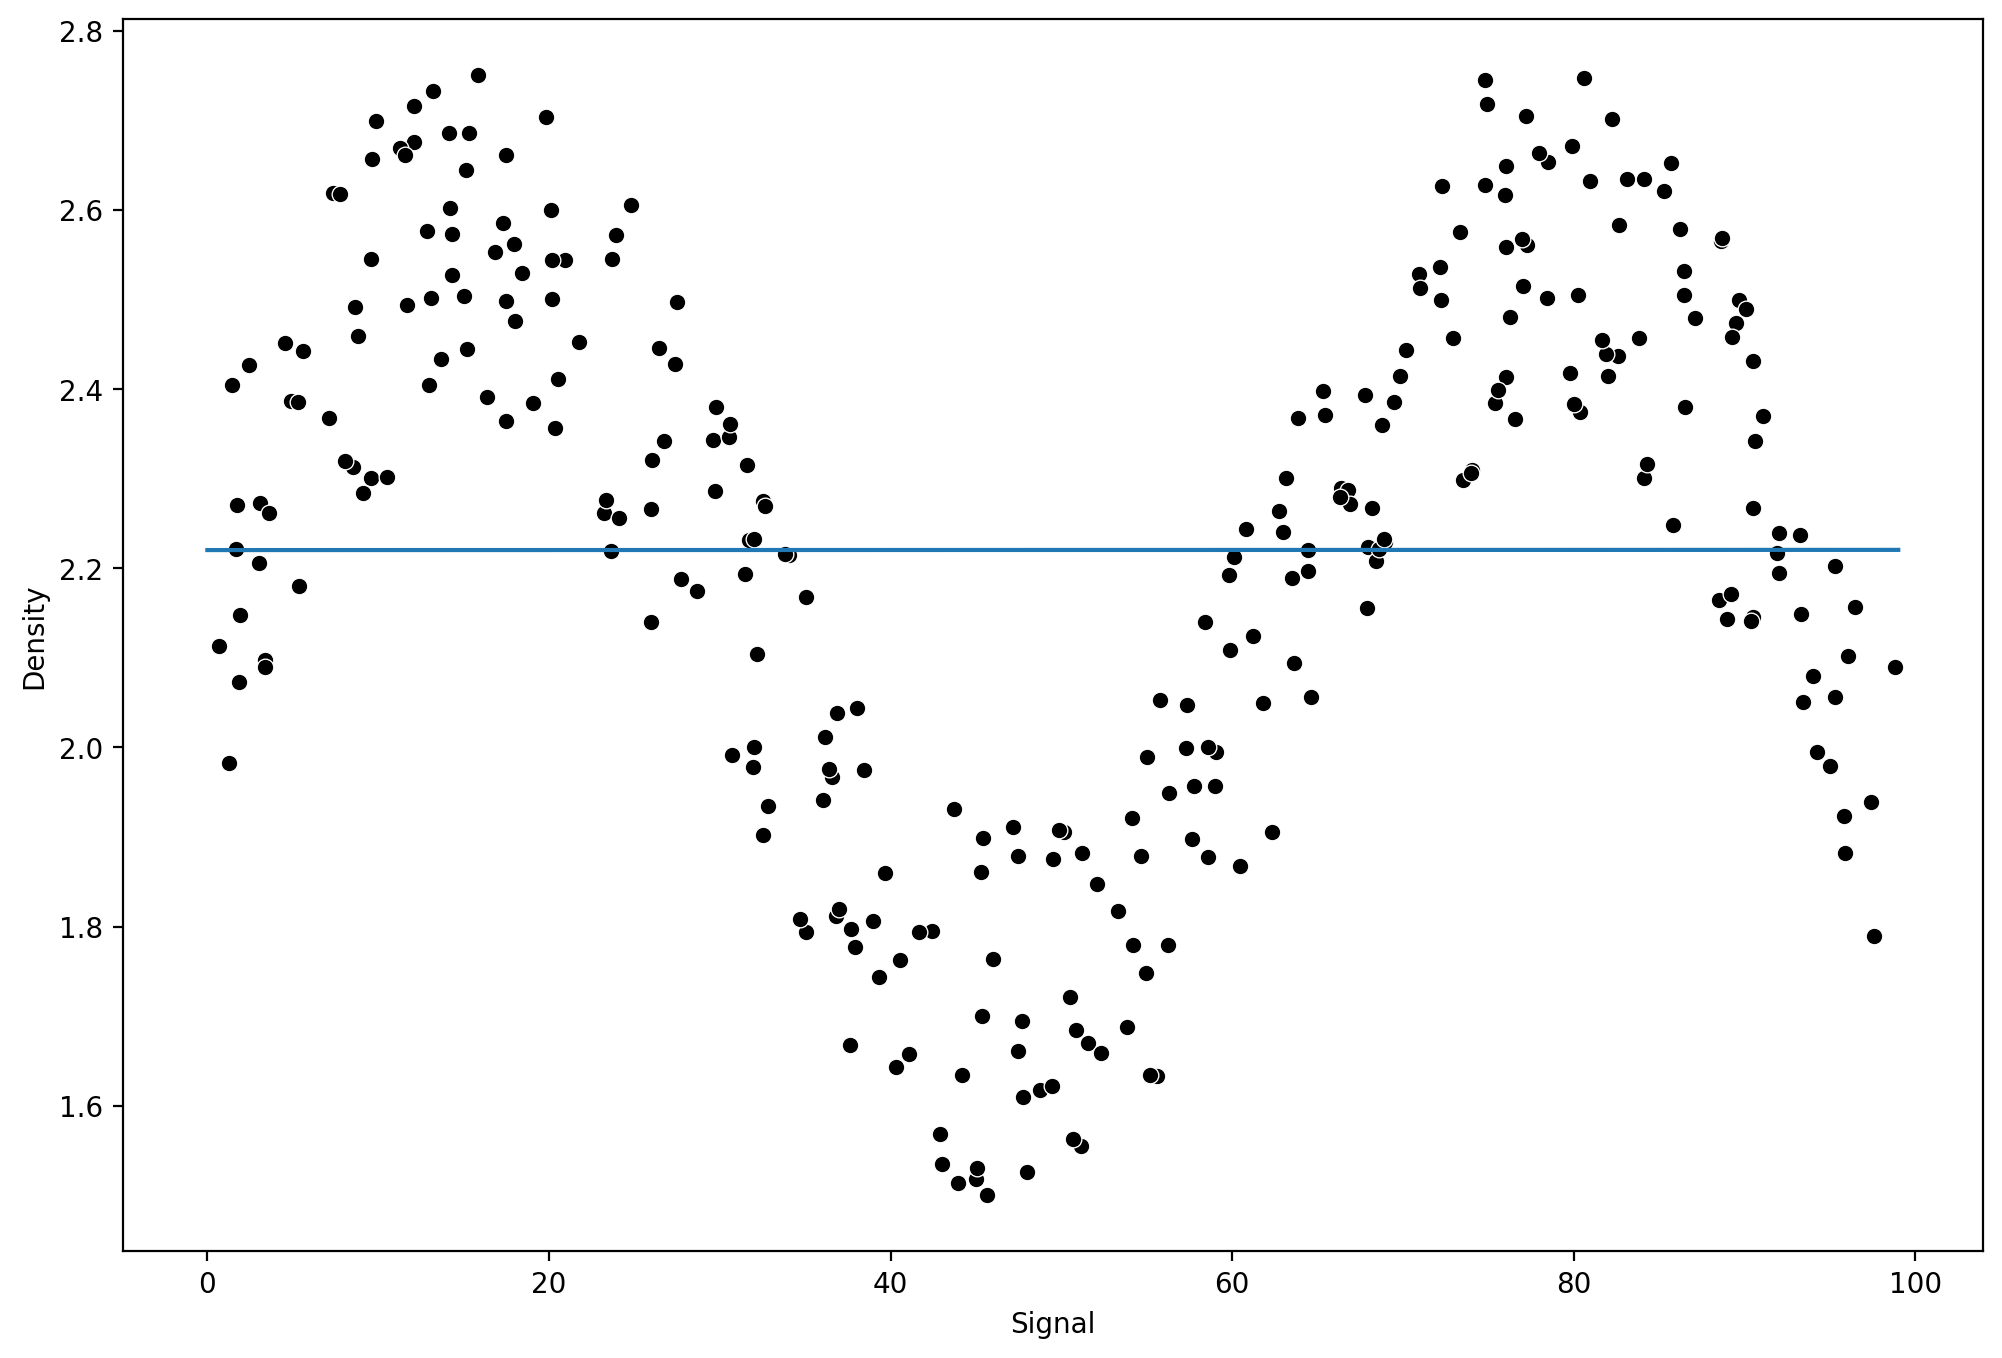

In [17]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=rock_density_df,color='black')
plt.plot(signal_range,lr_output)

## Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

## Function to Help Run Models

In [23]:
model = LinearRegression()


In [26]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=rock_density_df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


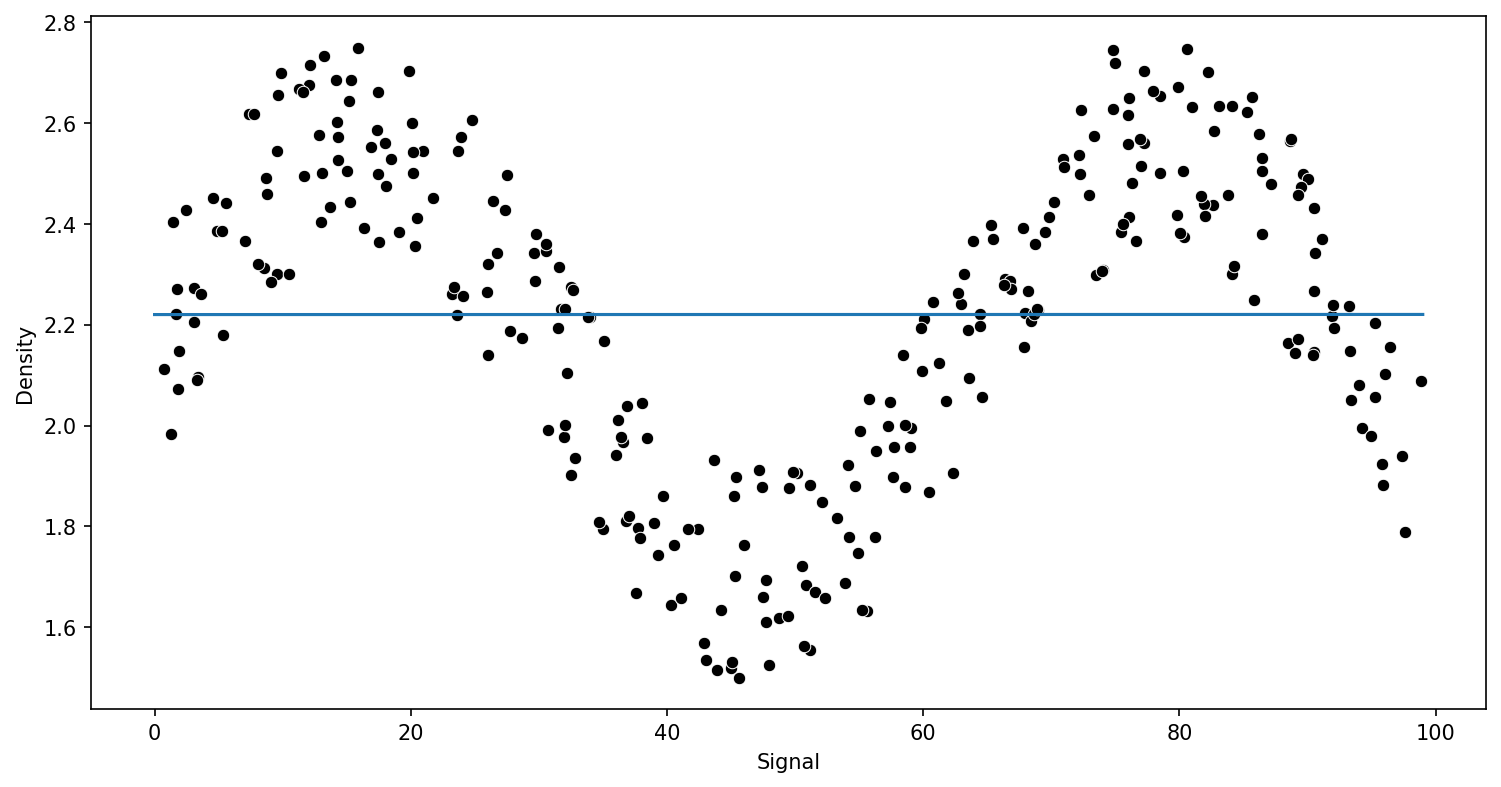

In [27]:
run_model(model,X_train,y_train,X_test,y_test)


## Pipeline for Poly Orders

In [28]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())


RMSE : 0.2817309563725596


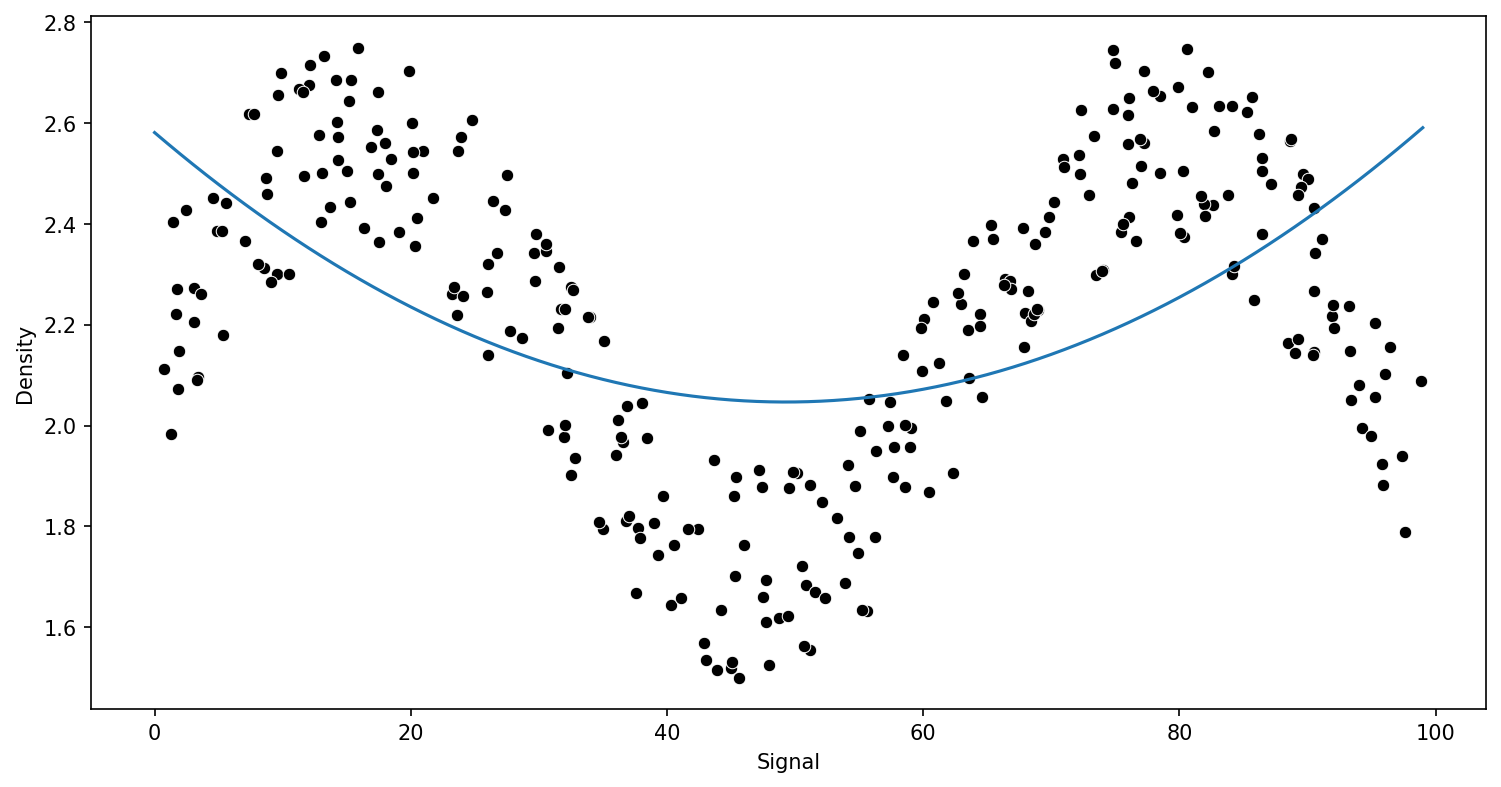

In [29]:
run_model(pipe,X_train,y_train,X_test,y_test)


## Comparing Various Polynomial Orders

RMSE : 0.14078766602101847


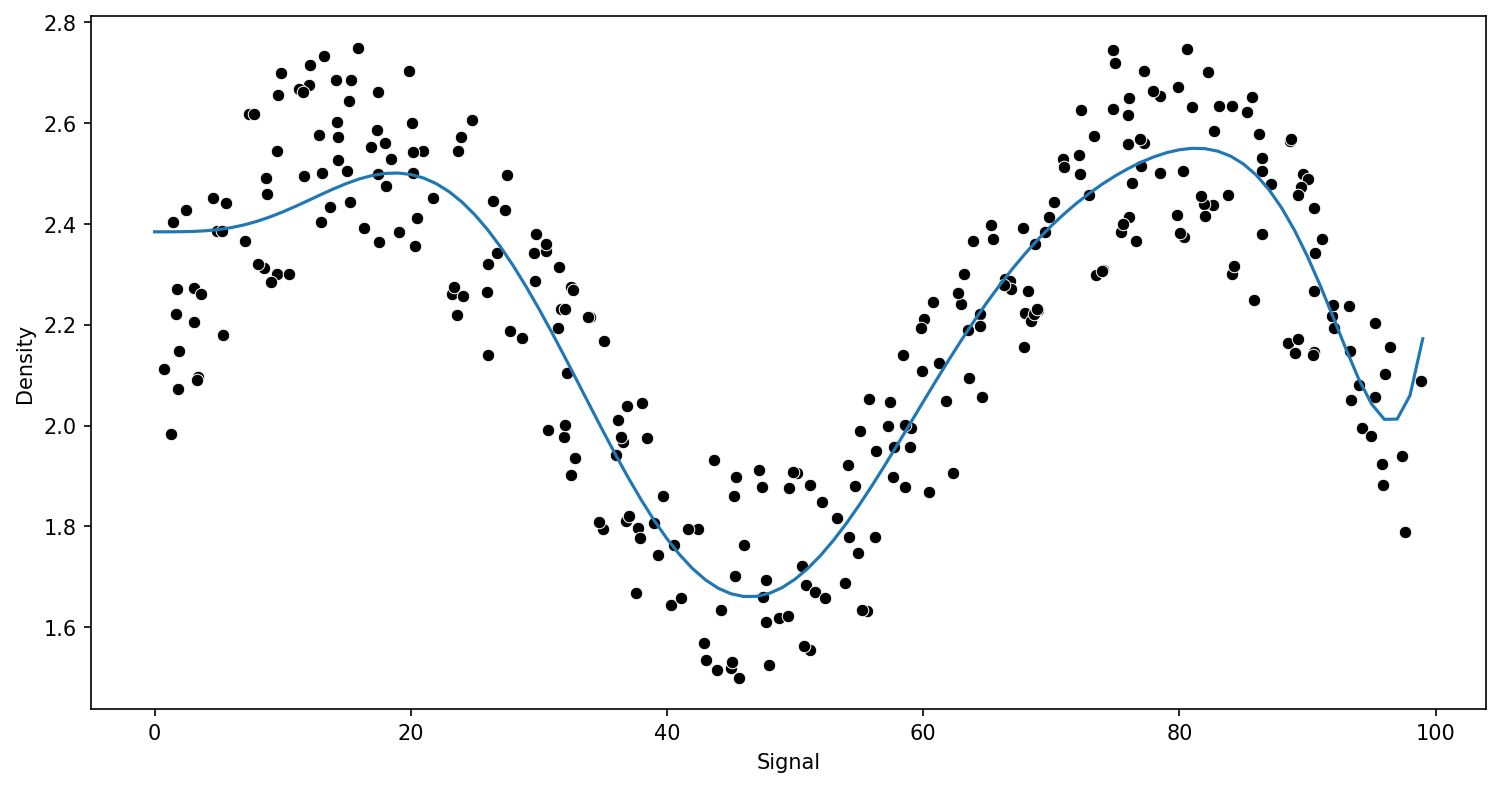

In [30]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


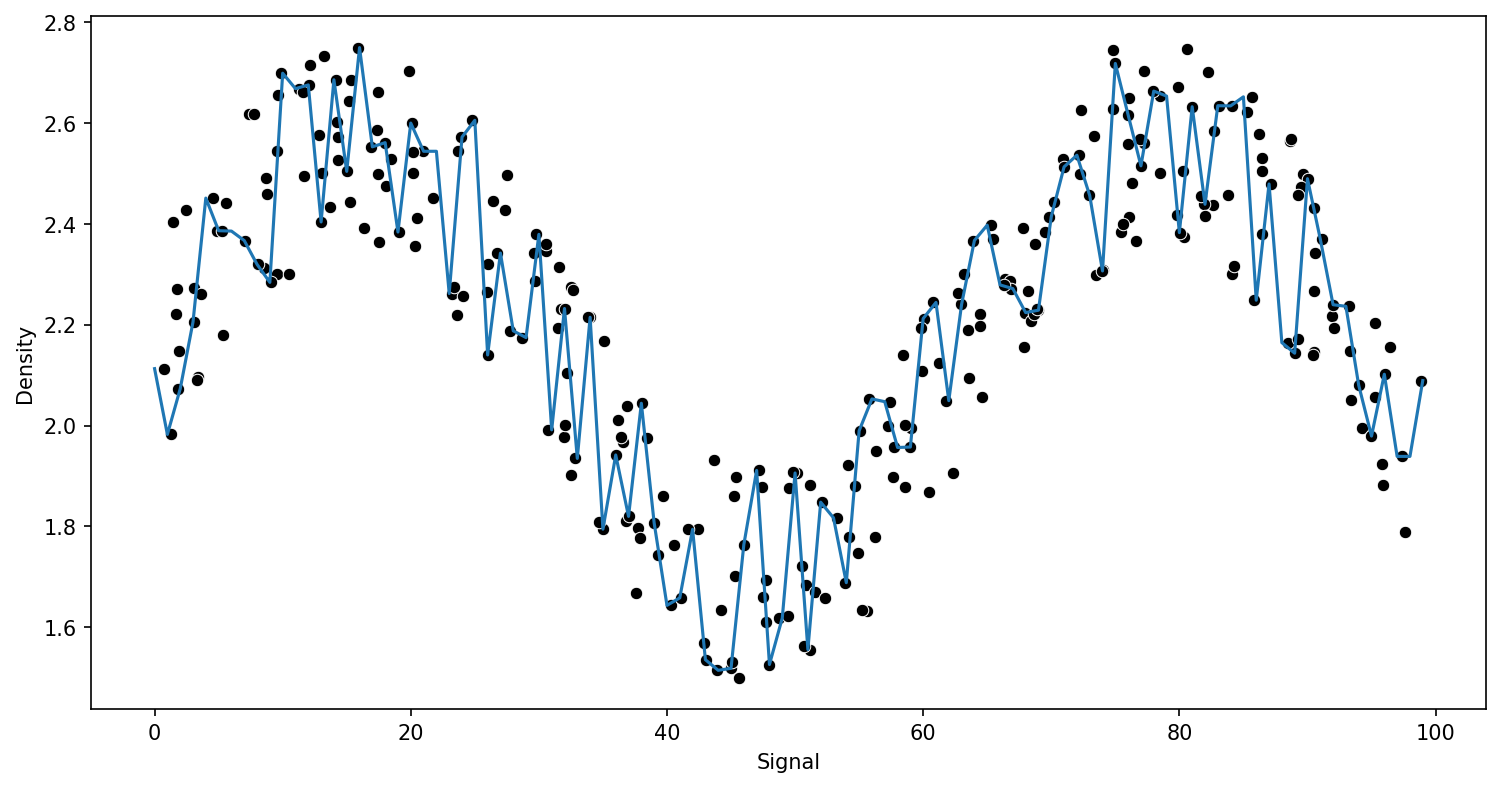

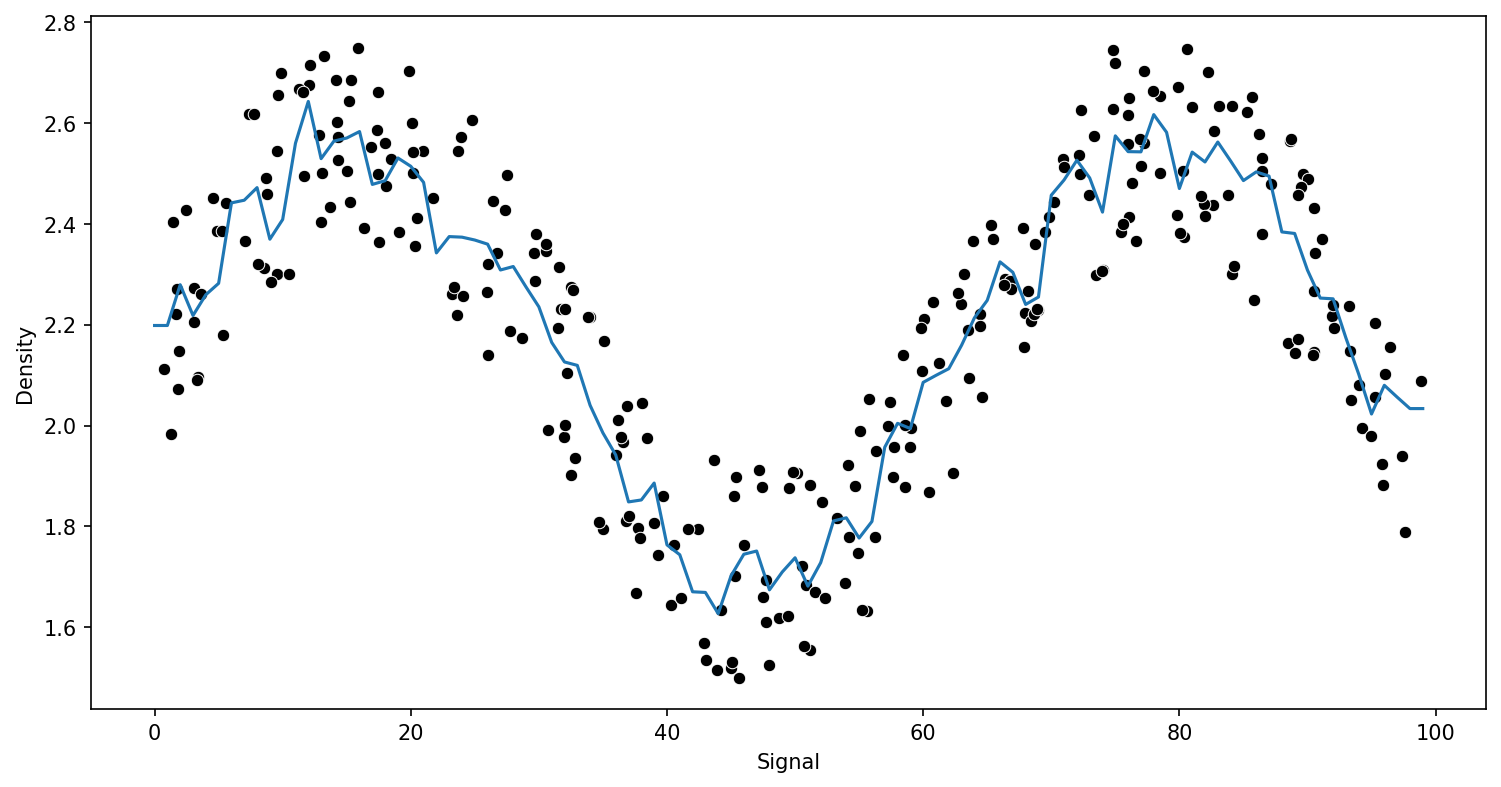

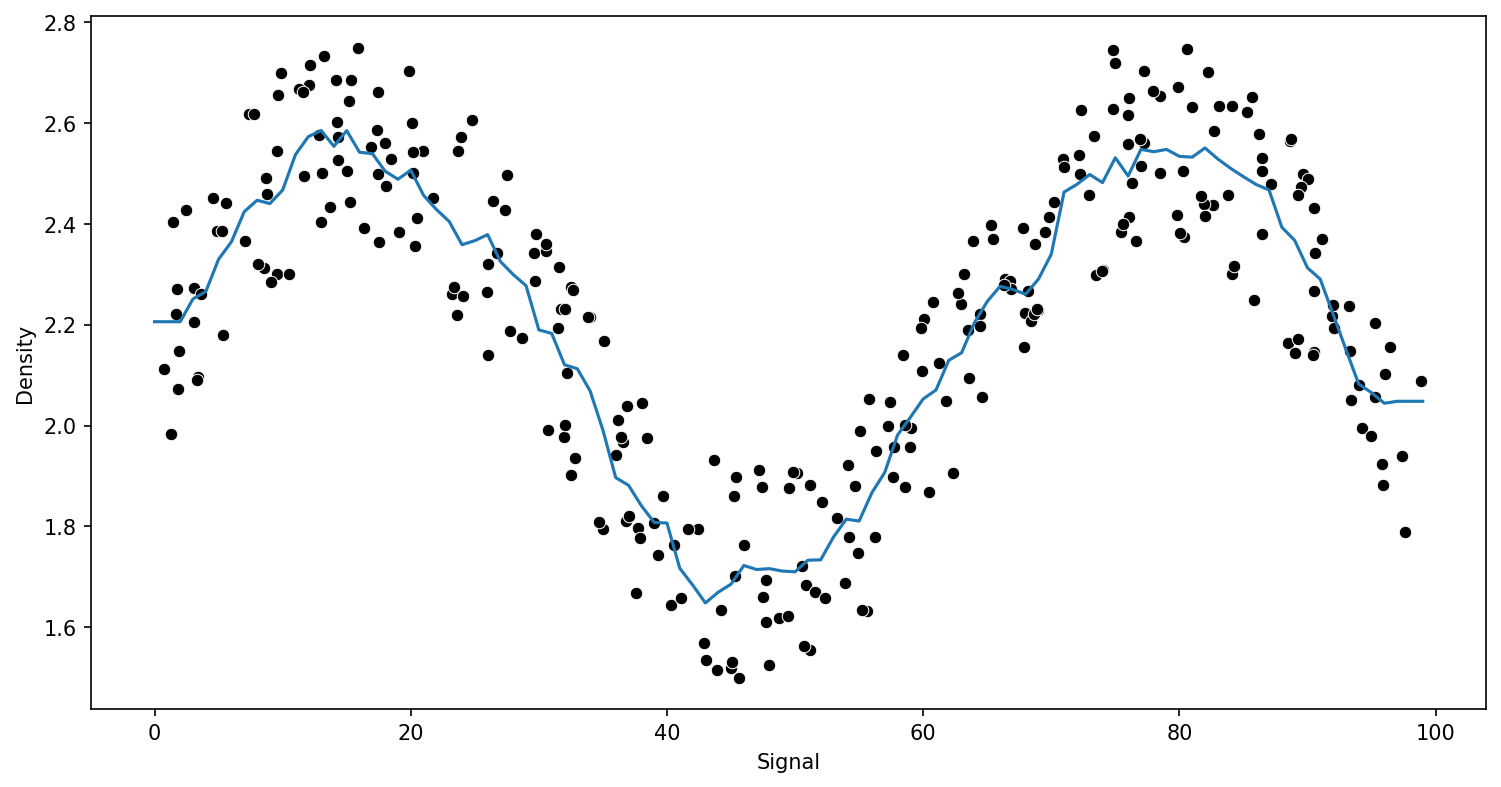

In [31]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

RMSE : 0.1523487028635337


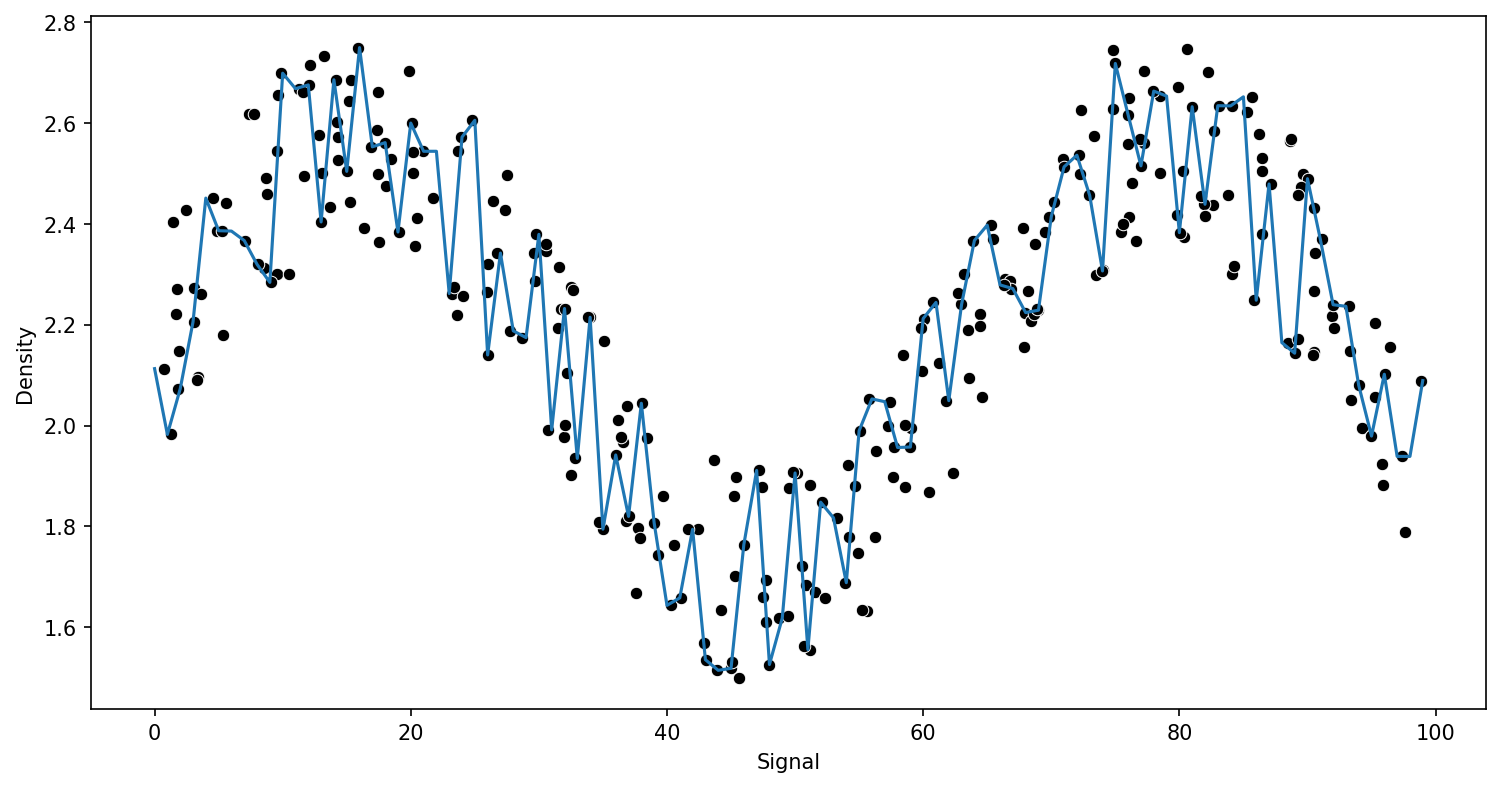

In [32]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [33]:
model.get_n_leaves()


270

In [34]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [35]:
grid = GridSearchCV(svr,param_grid)


RMSE : 0.12646999302047557


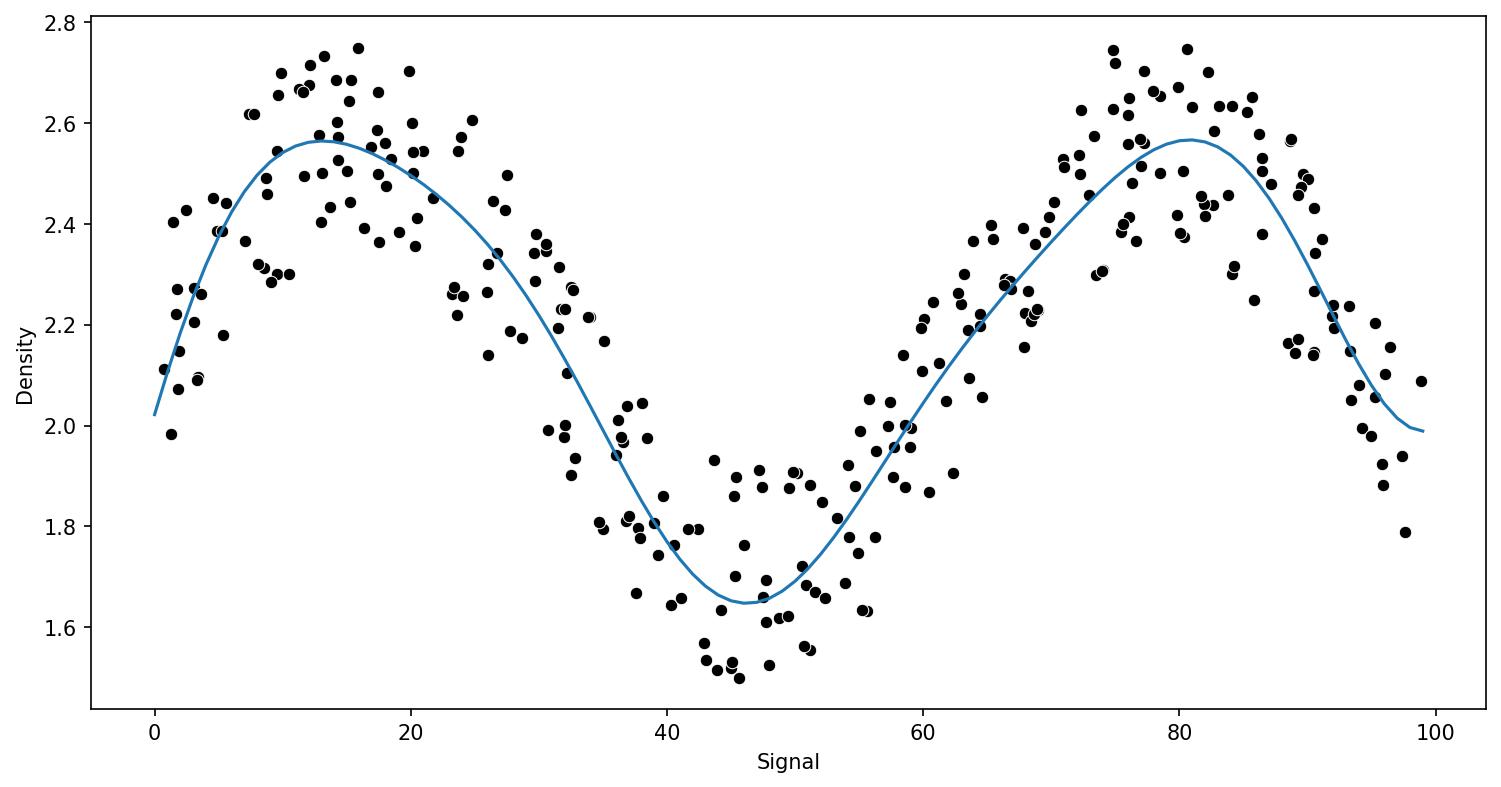

In [36]:
run_model(grid,X_train,y_train,X_test,y_test)


In [37]:
grid.best_estimator_


SVR(C=1000)

RMSE : 0.12880800901949174
RMSE : 0.1396260764178636
RMSE : 0.13593162276449638


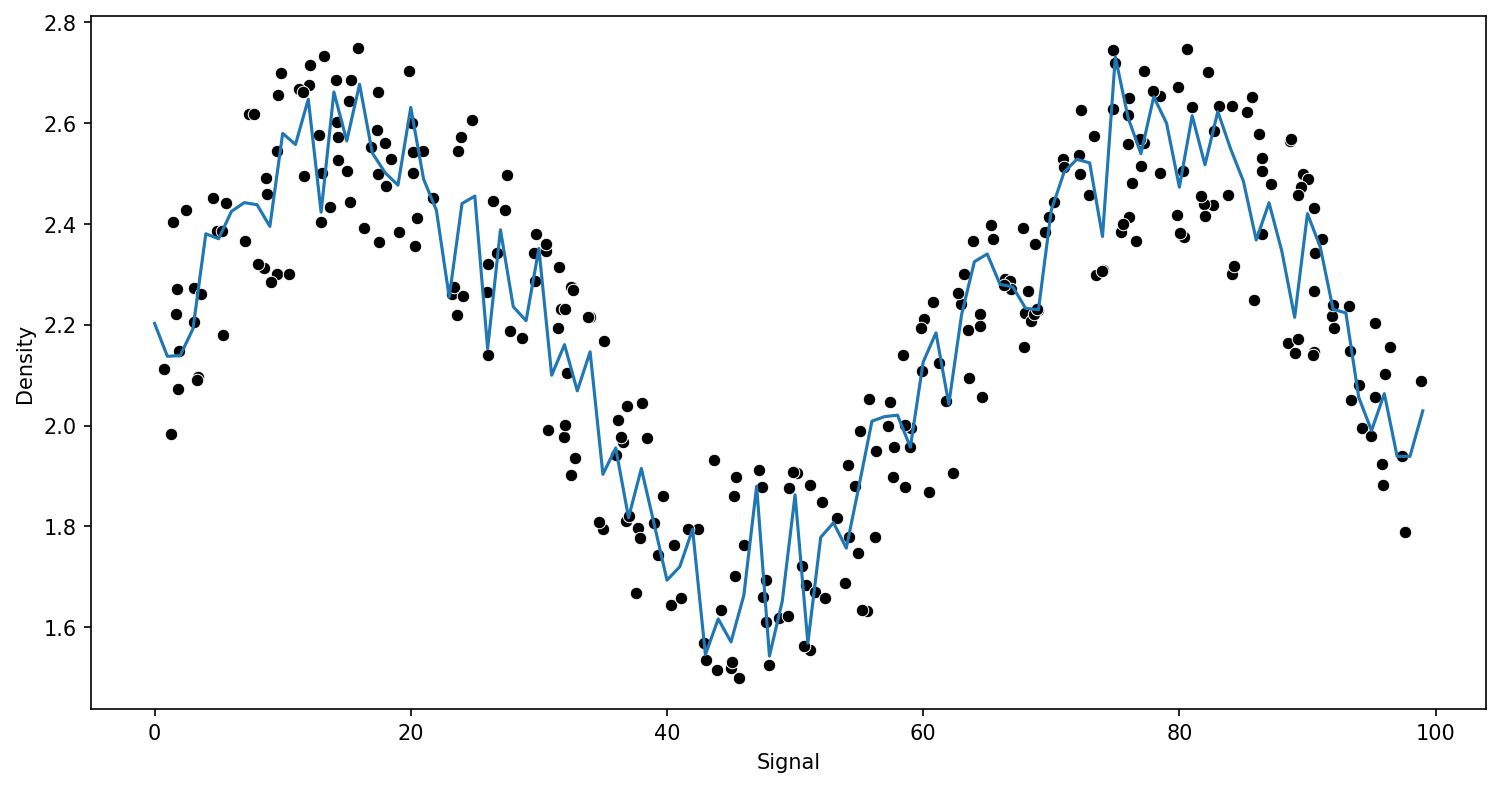

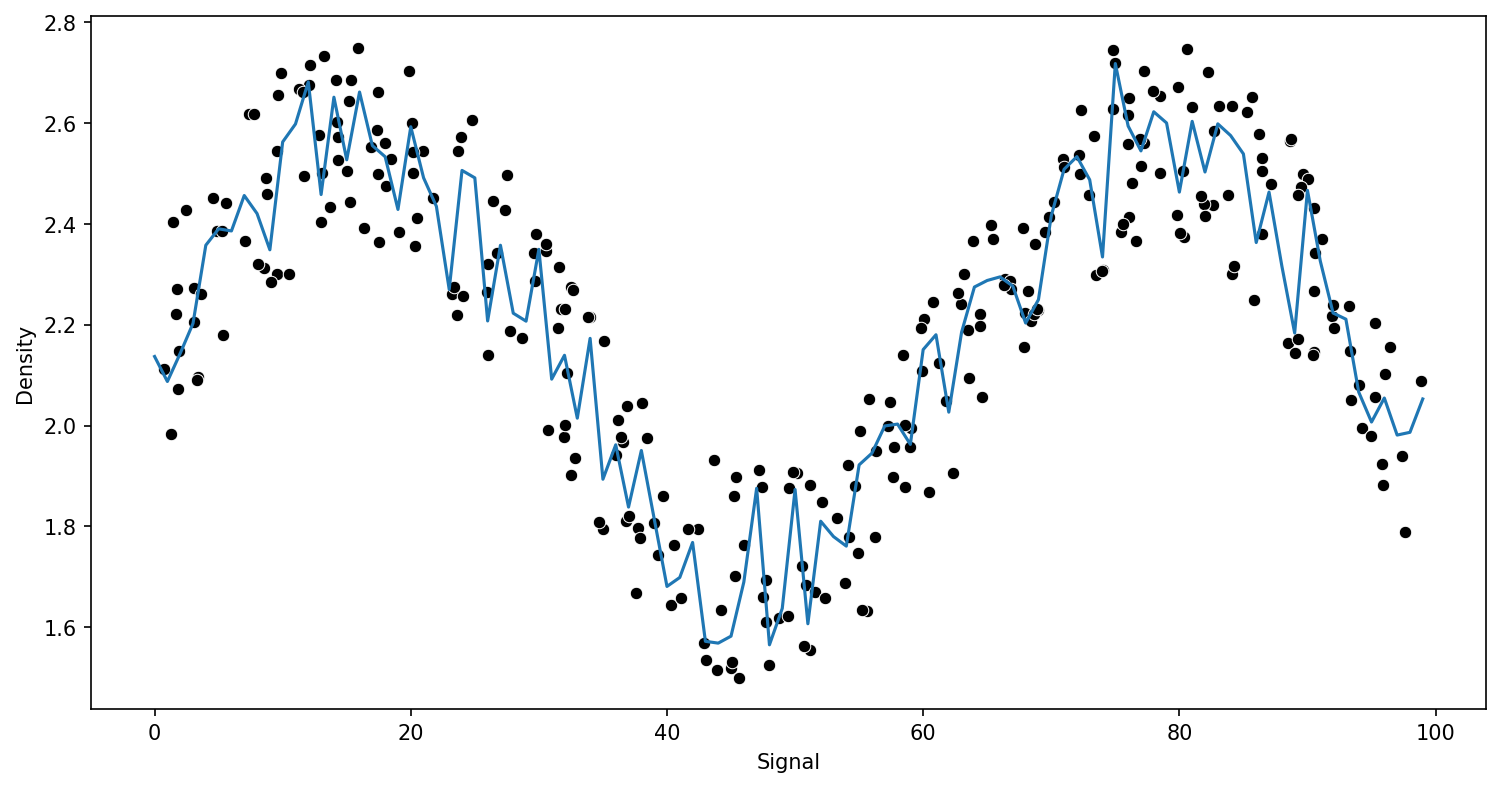

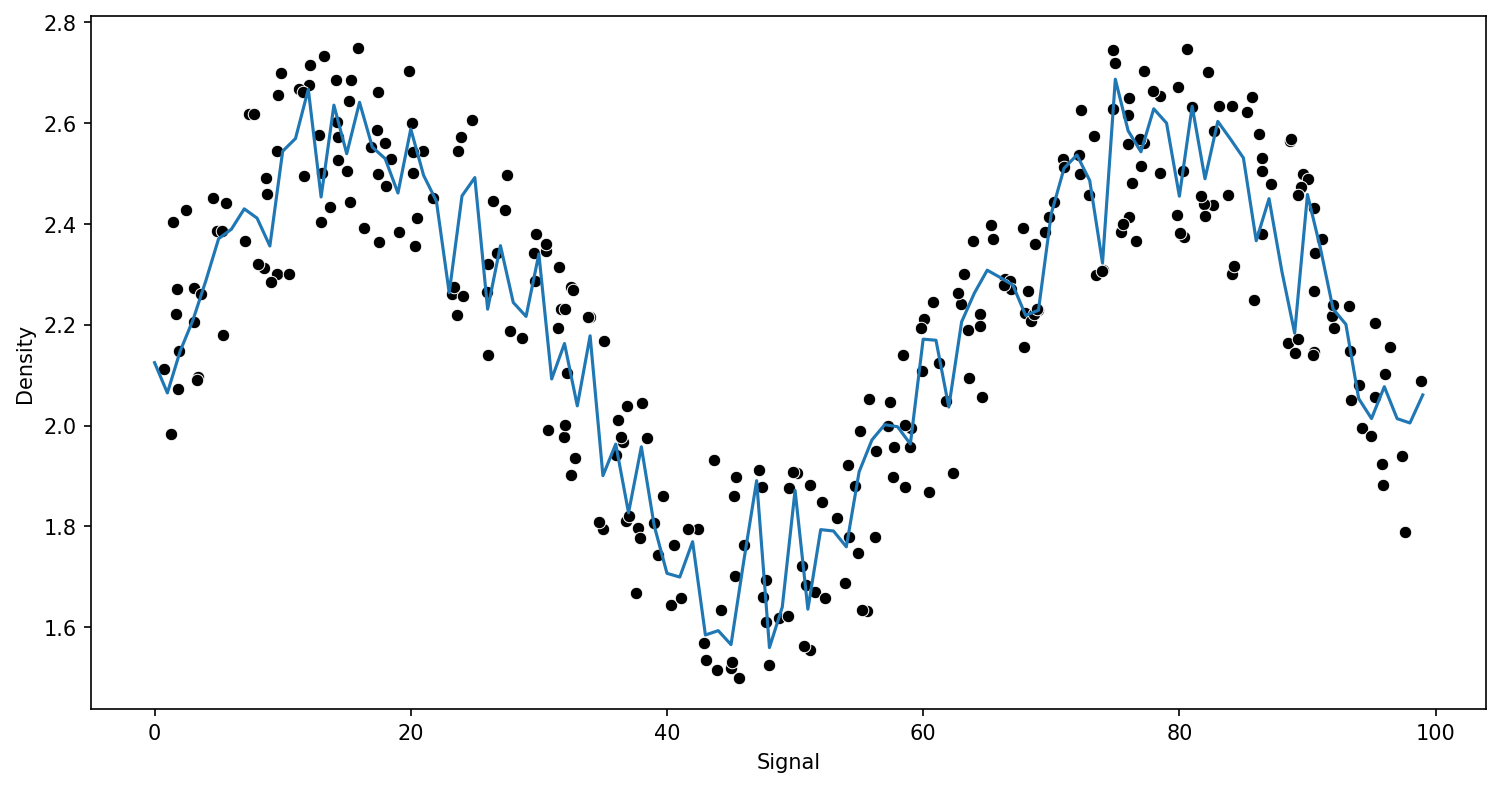

In [38]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

We will cover this in more detail in next section.

RMSE : 0.13294148649584667


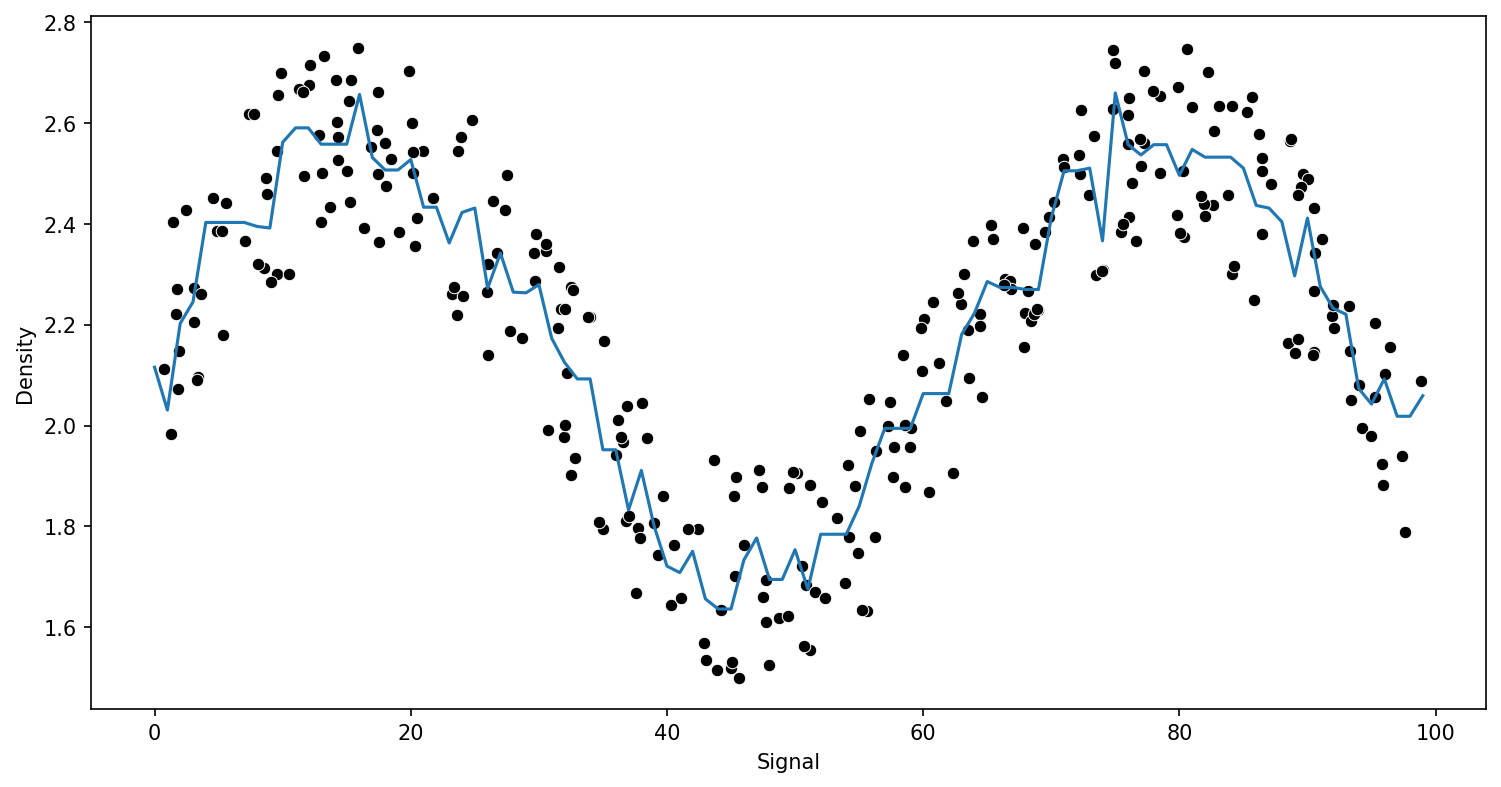

In [39]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

RMSE : 0.13095612668452572


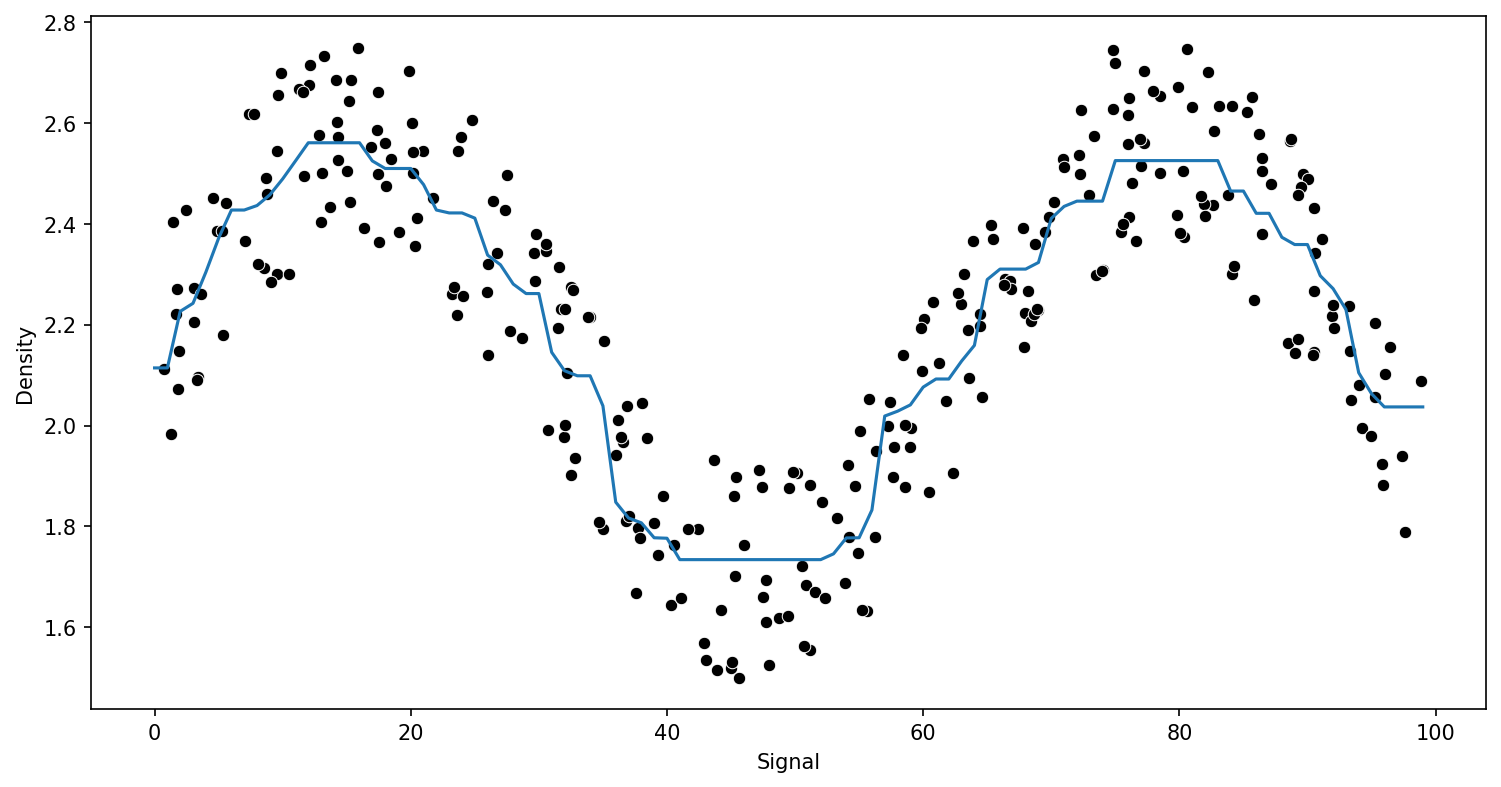

In [40]:
model = AdaBoostRegressor()

run_model(model,X_train,y_train,X_test,y_test)